In [4]:
import numpy as np
import awkward as ak
import uproot

import hist
from topcoffea.modules.histEFT import HistEFT
import topcoffea.modules.utils as utils

import mplhep as hep
import matplotlib.pyplot as plt
import os

import plotting_tools_histEFT as plotTools

In [2]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20, 
          'lines.markersize':5}
plt.rcParams.update(params)

In [8]:
def make_scatter_list_oneWC(scatter_dict, norm, norm_uncert):
	'''
	scatter_dict must be a single entry dictionary, with only the information for a single WC
	'''
	scatter_xvals = scatter_dict[0]
	scatter_yvals = np.divide(np.array(scatter_dict[1]), norm)
	scatter_sigma = np.array(scatter_dict[2])
	sigma_y = np.multiply(scatter_yvals, (np.sqrt(np.add(np.square(np.divide(scatter_sigma, scatter_dict[1])),np.square(np.divide(norm_uncert, norm))))))

	return [scatter_xvals, scatter_yvals, sigma_y]

SM Cross sections for each standAlone: 
- `tW_yukawa_all.txt`: SM = 5.445 +- 0.02162 pb
- `tW_yukawa_lgymb.txt`: SM = 5.445 +- 0.02162 pb
- `tW_yukawa_smymb.txt` : SM = 5.445 +- 0.02162 pb
- `tW_yukawa_smyl.txt` : SM = 5.445 +- 0.02162 pb

In [10]:
wc_lst = utils.get_list_of_wc_names("/cms/cephfs/data/store/user/hnelson2/mc/NanoGen/tW_yukawa_redo/NanoGen_tW_yukawa/nanoGen_115.root")
# print(wc_lst)

In [6]:
#original tW yukawa MG standalone (ymb, yml all turned on) 
orig = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_yukawa_all.txt")

ymb_large = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_yukawa_lgymb.txt")
ymb_small = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_yukawa_smymb.txt")
yml_small_large_rwgts = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_yukawa_smyl.txt")

In [15]:
# for wc in orig.keys():
#     orig_dict = make_scatter_list_oneWC(orig[wc], 5.445, 0.02162)
#     ymb_large_dict = make_scatter_list_oneWC(ymb_large[wc], 5.445, 0.02162)
#     ymb_small_dict = make_scatter_list_oneWC(ymb_small[wc], 5.445, 0.02162)

#     fig, ax = plt.subplots()
#     ax.scatter(orig_dict[0], orig_dict[1], label = "original ym*")
#     ax.errorbar(orig_dict[0], orig_dict[1], yerr = orig_dict[2], xerr = None, capsize=5, ls='none')

#     ax.scatter(ymb_large_dict[0], ymb_large_dict[1], label = "large ymb")
#     ax.errorbar(ymb_large_dict[0], ymb_large_dict[1], yerr = orig_dict[2], xerr = None, capsize=5, ls='none')

#     ax.scatter(ymb_small_dict[0], ymb_small_dict[1], label = "small ymb")
#     ax.errorbar(ymb_small_dict[0], ymb_small_dict[1], yerr = orig_dict[2], xerr = None, capsize=5, ls='none')

#     ax.legend(loc='best', fontsize='medium') #bbox_to_anchor=(1.02, 0.5),
#     ax.set_xlabel(wc, fontsize = 'large')
#     ax.set_ylabel(r"$\sigma_{SMEFT} /\ \sigma_{SM}$", fontsize='large')
#     fig.show()

In [19]:
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/"
for wc in orig.keys():
    orig_dict = make_scatter_list_oneWC(orig[wc], 5.445, 0.02162)
    ymb_large_dict = make_scatter_list_oneWC(ymb_large[wc], 5.445, 0.02162)
    ymb_small_dict = make_scatter_list_oneWC(ymb_small[wc], 5.445, 0.02162)

    fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,12),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
    )
    fig.subplots_adjust(hspace=.1)
    
    ax.scatter(orig_dict[0], orig_dict[1], label = "original ym*", color='tab:blue')
    ax.errorbar(orig_dict[0], orig_dict[1], yerr = orig_dict[2], xerr = None, capsize=5, ls='none', color='tab:blue')

    ax.scatter(ymb_large_dict[0], ymb_large_dict[1], label = "large ymb", color='tab:orange')
    ax.errorbar(ymb_large_dict[0], ymb_large_dict[1], yerr = orig_dict[2], xerr = None, capsize=5, ls='none', color='tab:orange')

    ax.scatter(ymb_small_dict[0], ymb_small_dict[1], label = "small ymb", color='tab:green')
    ax.errorbar(ymb_small_dict[0], ymb_small_dict[1], yerr = orig_dict[2], xerr = None, capsize=5, ls='none', color='tab:green')

    rax.scatter(orig_dict[0], np.divide(ymb_large_dict[0],orig_dict[0]), color='tab:orange')
    rax.scatter(orig_dict[0], np.divide(ymb_small_dict[0],orig_dict[0]), color='tab:green')

    ax.legend(loc='best', fontsize='medium') #bbox_to_anchor=(1.02, 0.5),
    ax.set_ylabel(r"$\sigma_{SMEFT} /\ \sigma_{SM}$", fontsize='large')
    rax.set_xlabel(wc, fontsize = 'large')
    rax.set_ylabel("new/orig")
    rax.axhline(y=1.0, color='gray', linestyle='--')
    # fig.show()

    outname = os.path.join(outpath, f"1d_quad_{wc}.png")    
    fig.savefig(outname)
    print(f'plot saved to {outname}')
    plt.close(fig)
    # fig.show()

plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_ctGIm.png
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_ctGRe.png
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_cHQ3.png
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_ctWRe.png
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_cleQt3Re.png
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_cleQt1Re.png
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_cQl3.png
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_cbWRe.png
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/ymb_checks/1d_quad_cHtbRe.png


/tmp/ipykernel_2280106/3372881586.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


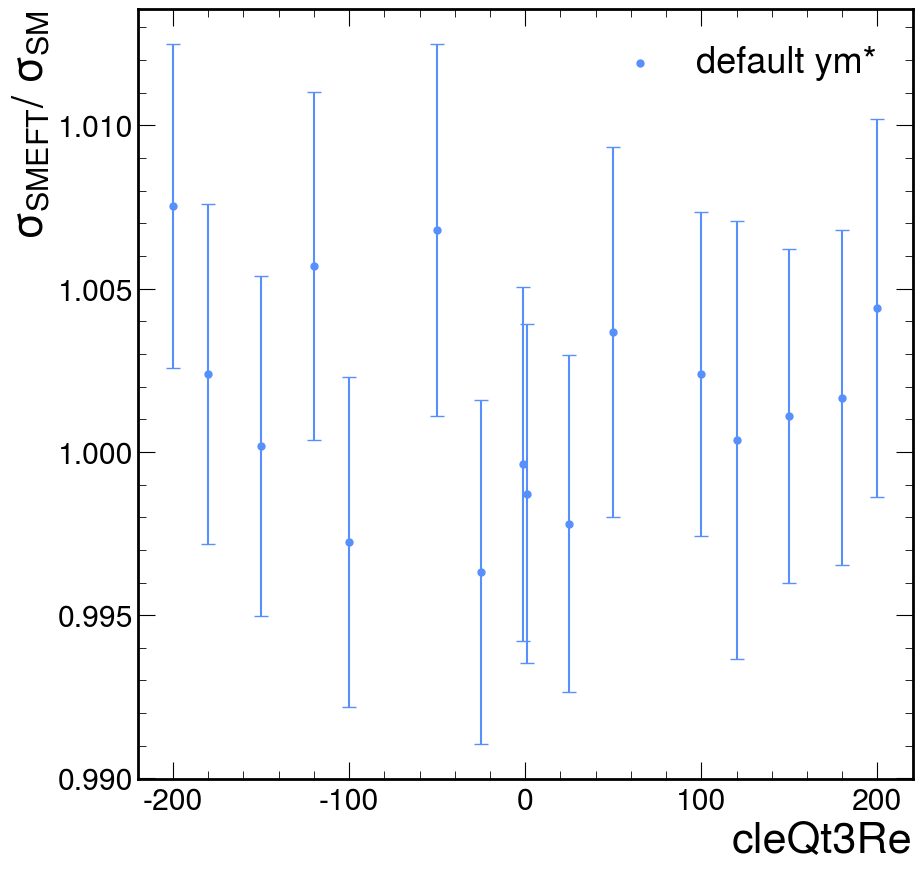

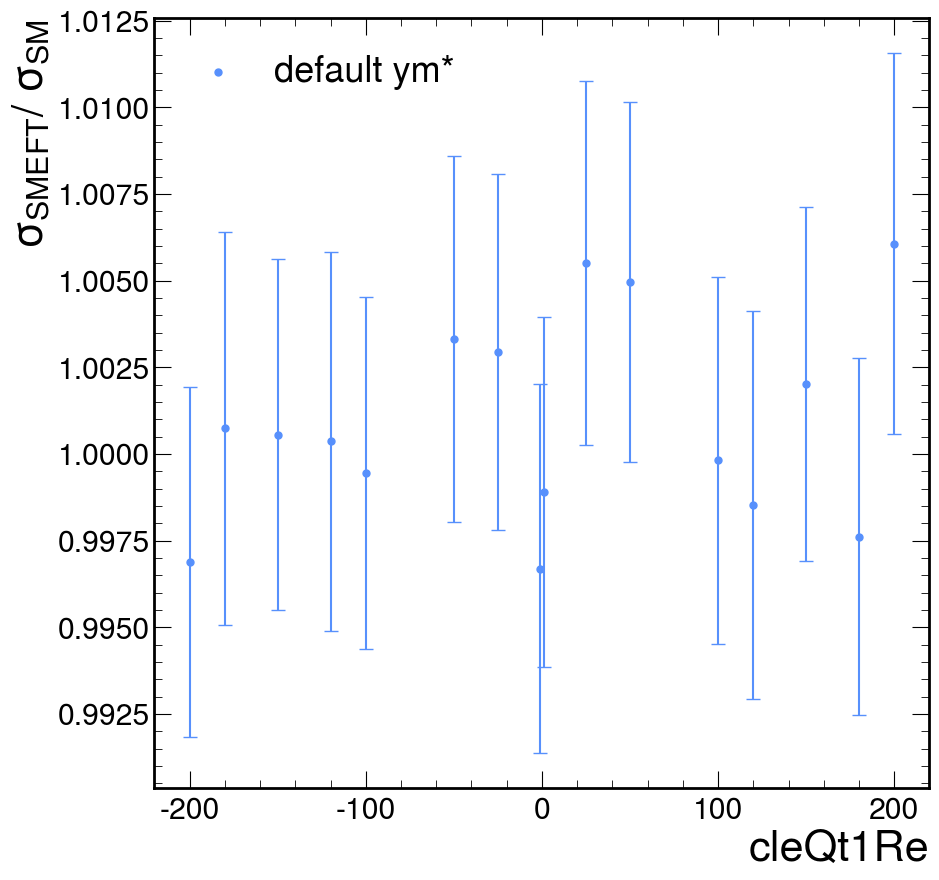

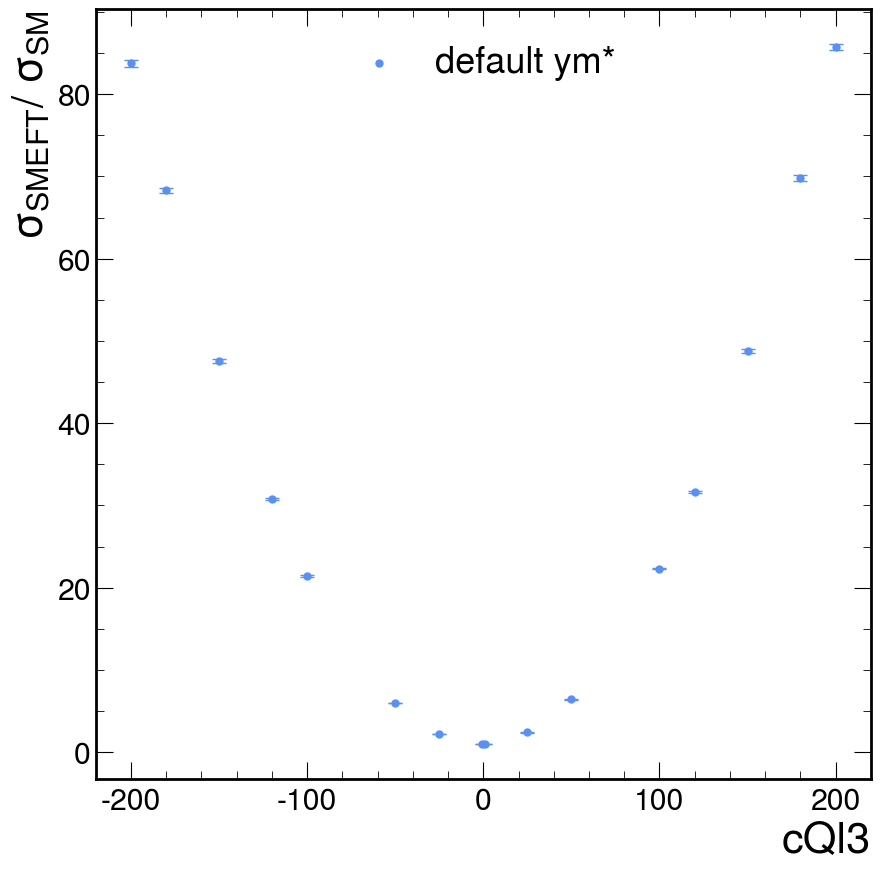

In [16]:
for wc in yml_small_large_rwgts.keys():
    test_dict = make_scatter_list_oneWC(yml_small_large_rwgts[wc], 5.445, 0.02162)

    fig, ax = plt.subplots()
    ax.scatter(test_dict[0], test_dict[1], label = "default ym*")
    ax.errorbar(test_dict[0], test_dict[1], yerr = test_dict[2], xerr = None, capsize=5, ls='none')

    ax.legend(loc='best', fontsize='medium') #bbox_to_anchor=(1.02, 0.5),
    ax.set_xlabel(wc, fontsize = 'large')
    ax.set_ylabel(r"$\sigma_{SMEFT} /\ \sigma_{SM}$", fontsize='large')
    fig.show()